In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import glob
import itertools
import os

from run import Run
from runs_db import db as runs_db

[('martak', 102), ('gcp', 60), ('deepnet2', 75), ('fiit-gcp-1', 10), ('fiit-gcp-2', 13), ('fiit-gcp-3', 14), ('acer', 30)]


In [2]:
log_path = '/home/fiit/logs'
runs = []

for server in runs_db:
    paths = glob.glob(os.path.join(log_path, server, '*'))
    paths = iter(sorted(paths))

    try:
        for (number, type_, code) in runs_db[server]:
            for _ in range(number):
                try:
                    path = next(paths)
                    runs.append(Run(path, type_, code))
                except KeyError:
                    print(path)
    except StopIteration:
        pass


/home/fiit/logs/martak/2019-02-19-110943
/home/fiit/logs/fiit-gcp-1/2019-02-27-094723


In [15]:
tasks = ['dep', 'lmo', 'ner', 'pos']
langs = ['cs', 'de', 'en', 'es']

task_metr = {
    'dep': 'las',
    'lmo': 'perplexity',
    'ner': 'chunk_f1',
    'pos': 'acc'
}

task_max = {
    'dep': True,
    'lmo': False,
    'ner': True,
    'pos': True
}

def draw_graphs(metric_func, tasks, langs, role, run_codes=None, run_types=None):
    fig, axes = plt.subplots(len(tasks), len(langs), figsize=(5*len(langs), 4*len(tasks)), squeeze=False)

    relevant_runs = ['vanilla']

    for task, lang in itertools.product(tasks, langs):
        for run in runs:
            if (
                run.contains(task, lang) and
                (run_codes is None or run.code in run_codes) and
                (run_types is None or run.type in run_types)
            ):

                history = run.history(
                    metric=metric_func(task),
                    task=task,
                    language=lang,
                    role=role)
                axes[tasks.index(task), langs.index(lang)].plot(list(history), label=f'{run.code}-{run.type}')

    for ax, col in zip(axes[0], langs):
        ax.set_title(col)

    for ax, row in zip(axes[:, 0], tasks):
        ax.set_ylabel(row, rotation=0, size='large')
        
    for ax_row in axes:
        for ax in ax_row:
            ax.legend()

    plt.show()
    
def print_results(metric_func, metric_max_func, tasks, langs, run_codes=None, run_types=None):
    
    for task, lang in itertools.product(tasks, langs):
        for run in runs:
            if (
                run.contains(task, lang) and
                (run_codes is None or run.code in run_codes) and
                (run_types is None or run.type in run_types)
            ):
                result = run.metric_eval(
                    metric=metric_func(task),
                    max_=metric_max_func(task),
                    task=task,
                    language=lang)
                res = result[0]
                if res < 1.01:
                    res *= 100
                print(f'{res:.2f}', end='\n')
    print()
        

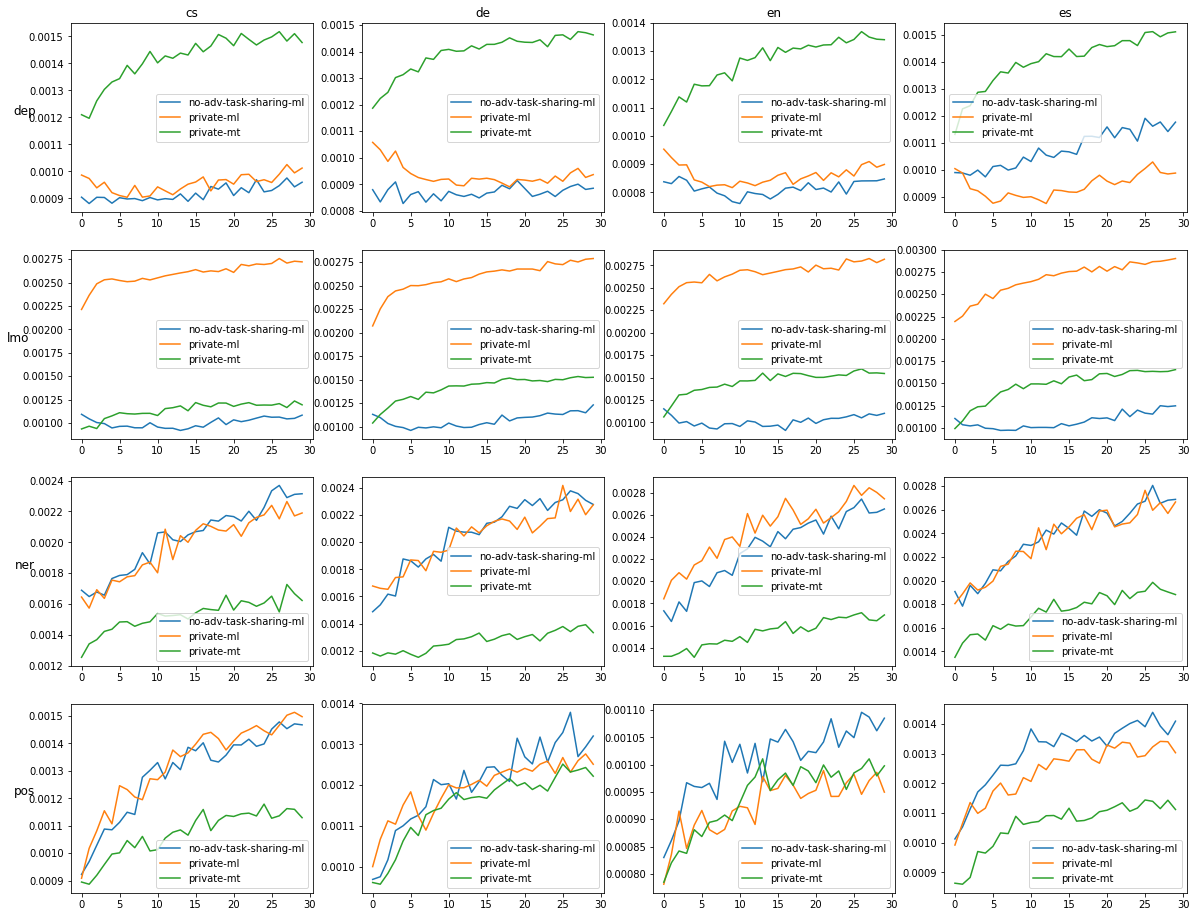

In [16]:
# draw_graphs(lambda task: task_metr[task], tasks, langs, 'test',
#              ['private-focused-200', 'no-adv-tsh-200'], ['ml'])
draw_graphs(lambda _: 'unit_strength_2', tasks, langs, 'test',
             ['private', 'no-adv-task-sharing'], ['ml', 'mt'])

In [33]:
print_results(lambda task: task_metr[task], lambda task: task_max[task], ['pos'], ['es'],
            ['one-aux'])
# print_results(lambda task: task_metr[task], lambda task: task_max[task], ['dep'], ['en'],
#             ['dep-adv-lambda-0.25'])
# print_results(lambda task: task_metr[task], lambda task: task_max[task], ['dep'], ['en'],
#             ['dep-adv-lambda-0.125'])
# print_results(lambda task: task_metr[task], lambda task: task_max[task], ['dep'], ['en'],
#             ['no-adv-task-sharing'], ['ml'])

96.67 <run.Run object at 0x7fc1307a08d0>
96.58 <run.Run object at 0x7fc12f4e6550>
96.61 <run.Run object at 0x7fc12e8abc18>
96.57 <run.Run object at 0x7fc12e3b6e10>
96.75 <run.Run object at 0x7fc12eb4bdd8>
96.33 <run.Run object at 0x7fc12eabde48>
96.52 <run.Run object at 0x7fc12e868eb8>
96.77 <run.Run object at 0x7fc12e542f28>
96.86 <run.Run object at 0x7fc12e560b70>



In [5]:
print('89.16 86.51 98.97 96.87 81.58 87.23')
print('mt')
print_results(lambda task: task_metr[task], lambda task: task_max[task], ['dep', 'pos', 'ner'], langs,
            ['no-adv-tsh-focused-dep-ner-pos-cs-es'], ['mt'])
print_results(lambda task: task_metr[task], lambda task: task_max[task], ['dep', 'pos', 'ner'], langs,
            ['private-focused-dep-ner-pos-cs-es'], ['mt'])
print_results(lambda task: task_metr[task], lambda task: task_max[task], ['dep', 'pos', 'ner'], langs,
            ['no-adv-tsh-focused-0.75-dep-ner-pos-cs-es'], ['mt'])
print_results(lambda task: task_metr[task], lambda task: task_max[task], ['dep', 'pos', 'ner'], langs,
            ['private-focused-0.75-dep-ner-pos-cs-es'], ['mt'])
print('ml')
print_results(lambda task: task_metr[task], lambda task: task_max[task], ['dep', 'pos', 'ner'], langs,
            ['no-adv-tsh-focused-dep-ner-pos-cs-es'], ['ml'])
print_results(lambda task: task_metr[task], lambda task: task_max[task], ['dep', 'pos', 'ner'], langs,
            ['private-focused-dep-ner-pos-cs-es'], ['ml'])
print_results(lambda task: task_metr[task], lambda task: task_max[task], ['dep', 'pos', 'ner'], langs,
            ['no-adv-tsh-focused-0.75-dep-ner-pos-cs-es'], ['ml'])
print_results(lambda task: task_metr[task], lambda task: task_max[task], ['dep', 'pos', 'ner'], langs,
            ['private-focused-0.75-dep-ner-pos-cs-es'], ['ml'])
print('mtml')
print_results(lambda task: task_metr[task], lambda task: task_max[task], ['dep', 'pos', 'ner'], langs,
            ['no-adv-tsh-focused-dep-ner-pos-cs-es'], ['mtml'])
print_results(lambda task: task_metr[task], lambda task: task_max[task], ['dep', 'pos', 'ner'], langs,
            ['private-focused-dep-ner-pos-cs-es'], ['mtml'])
print_results(lambda task: task_metr[task], lambda task: task_max[task], ['dep', 'pos', 'ner'], langs,
            ['no-adv-tsh-focused-0.75-dep-ner-pos-cs-es'], ['mtml'])
print_results(lambda task: task_metr[task], lambda task: task_max[task], ['dep', 'pos', 'ner'], langs,
            ['private-focused-0.75-dep-ner-pos-cs-es'], ['mtml'])





89.16 86.51 98.97 96.87 81.58 87.23
mt




ml




mtml






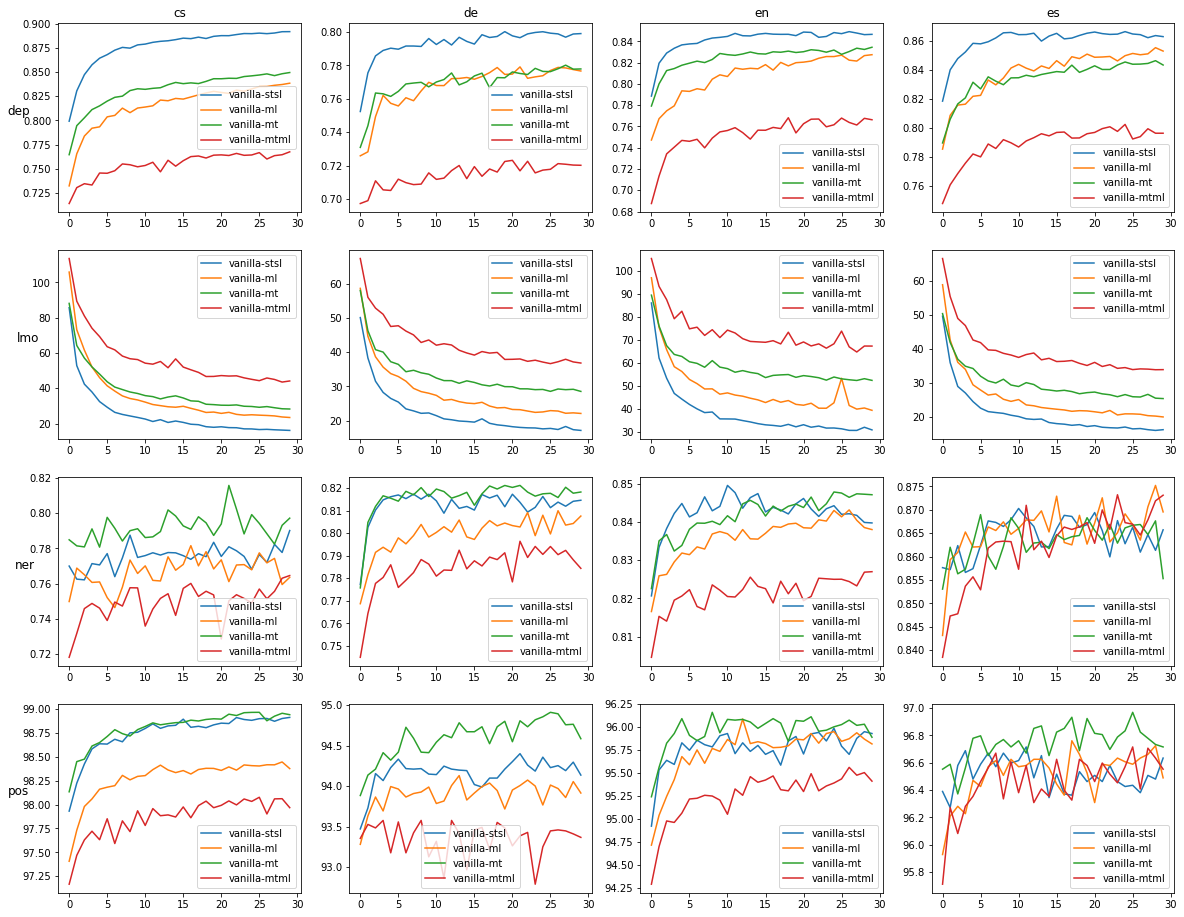

In [6]:
draw_graphs(lambda task: task_metr[task], tasks, langs, 'test', ['vanilla'])

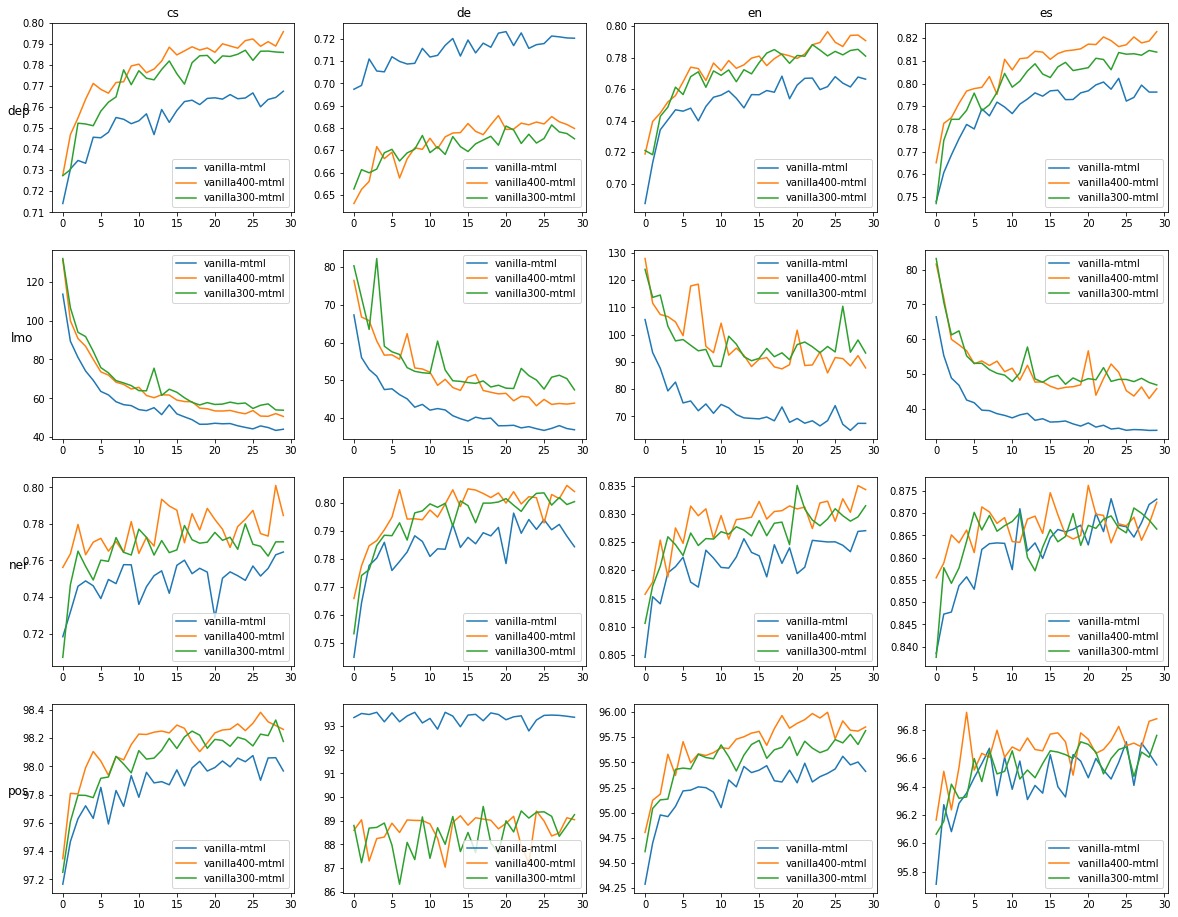

In [7]:
draw_graphs(lambda task: task_metr[task], tasks, langs, 'test',
            run_codes=['vanilla', 'vanilla300', 'vanilla400'],
            run_types=['mtml'])